In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
df_fake = pd.read_csv('/Users/ishikadang/Desktop/Fake.csv')
df_true = pd.read_csv('/Users/ishikadang/Desktop/True.csv')

In [3]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
df_fake['class'] = 0
df_true['class'] = 1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
#Removing last 10 rows
df_fake_manual_testing1 = df_fake.tail(10)
for i in range (23480, 23470-1):
    df_fake.drop([i], axis = 0, inplace = True)

df_true_manual_testing1 = df_true.tail(10)
for i in range (21416,21406-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake_manual_testing1

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [9]:
df_true_manual_testing1

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


#### EDA

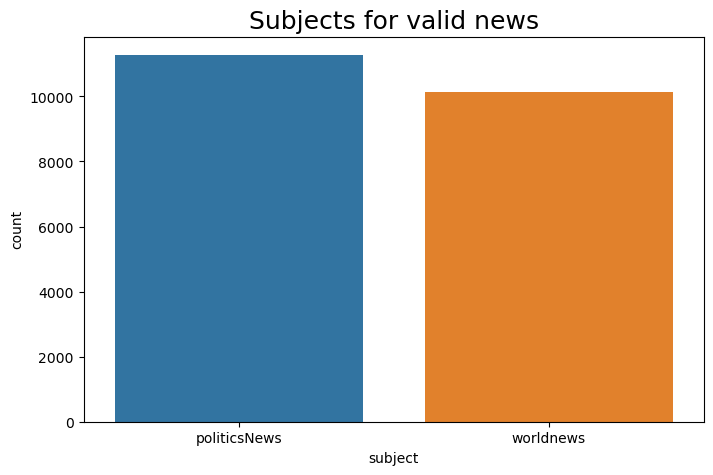

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='subject', data=df_true, order=df_true.subject.value_counts().index[:,])
plt.title('Subjects for valid news', size=18);
     

In [11]:
df_manual_testing1 = pd.concat([df_fake_manual_testing1,df_true_manual_testing1], axis= 0)
df_manual_testing1.to_csv('manual_testing1.csv')

#### Merging True and Fake Dataframes

In [12]:
df_merge = pd.concat([df_fake,df_true])
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [13]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### Removing irrelevant columns

In [14]:
df = df_merge.drop(['title','subject','date'], axis =1)

In [15]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the data

In [16]:
df = df.sample(frac = 1)

In [17]:
df

,text,class
2058,Just last year before the 2016 presidential el...,0
10795,Mick Mulvaney is one smart cookie. He s doing ...,0
21704,Members of the Catholic church need to pay clo...,0
12930,WASHINGTON (Reuters) - The U.S. State Departme...,1
6621,GOP presidential candidate John Kasich would l...,0
...,...,...
2133,(Reuters) - U.S. President Donald Trump disban...,1
10290,(Reuters) - U.S. Army Sergeant Bowe Bergdahl h...,1
13528,BEIRUT (Reuters) - Lebanon s Prime Minister Sa...,1
7834,It looks like Justice Antonin Scalia s untimel...,0


#### Function to process texts

In [18]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

#### Independent and dependent variables

In [19]:
x = df['text']
y = df['class']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [25]:
pred_lr=LR.predict(xv_test)

In [26]:
LR.score(xv_test, y_test)

0.9890423162583519

In [27]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5736
           1       0.99      0.99      0.99      5489

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



#### Decison Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)

DecisionTreeClassifier()

In [30]:
pred_dt = dt.predict(xv_test)

In [31]:
dt.score(xv_test, y_test)

0.9972383073496659

In [32]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5736
           1       1.00      1.00      1.00      5489

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



####  Gradient Boosting Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:


RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)


RandomForestClassifier(random_state=0)

In [35]:
pred_rfc = RFC.predict(xv_test)

In [36]:
RFC.score(xv_test, y_test)

0.9908240534521158

In [37]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5736
           1       0.99      0.99      0.99      5489

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [38]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = dt.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    
    

    return print("\n\nLR Prediction: {} \nDT Prediction: {}  \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                          output_lable(pred_DT[0]),  
                                                                                          output_lable(pred_RFC[0])))


In [39]:
news = str(input())
manual_testing(news)

By Dady Chery and Gilbert MercierAll writers with a desire to rattle people out of their torpor occasionally wonder if it is worthwhile to continue to try to raise their voices over the din of lies and distractions.More and more for us, such thoughts are occasioned, not by the mainstream, which predictably treats all the pronouncements from the powerful as being newsworthy, but by the fake left, which lobotomizes most of whom it touches. The increasing sophistication of this group and its rate of expansion are astounding. Its purpose is to annihilate and replace the real left, and it is making great strides in this regard.The real left includes those who, like Dr. Martin Luther King Jr. (MLK), came to realize that quantum leaps are the way to proceed, rather than tiny incremental change. The real left does not curry favor or approval from those in power; it challenges the social status quo and respects the inherent right of an injured and indignant population to rebel against authority

In [40]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of

In [41]:
news = str(input())
manual_testing(news)

LONDON (Reuters) - LexisNexis, a provider of legal, regulatory and business information, said on Tuesday it had withdrawn two products from the Chinese market in March this year after it was asked to remove some content.  The issue of academic freedom in China hit the headlines this week after the leading British academic publisher,  Cambridge University Press, said it had complied with a request to block online access to some scholarly articles in China.  It later reversed its position.   Earlier this year LexisNexis Business Insight Solutions in China was asked to remove some content from its database,  LexisNexis said in a statement.  In March 2017, the company withdrew two products (Nexis and LexisNexis Academic) from the Chinese market.  LexisNexis is owned by information group Relx.


LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News  
RFC Prediction: Not A Fake News
